In [1]:
import os
import sys
from collections import OrderedDict
import torch
import torchvision
import torchvision.models as models
from torch.utils import model_zoo

In [2]:
model = models.alexnet(pretrained=True)
model = model.cuda()

In [3]:
import untangle

In [4]:
from torchvision import models
import numpy as np
import torch
from torchvision import transforms
import PIL
import os
from IPython.display import Image
from untangle import UntangleAI
untangle_ai = UntangleAI() # load and define our package api

In [5]:
class Args:
    mname = 'alexnet'
    img_size = (3,224,224) # a 3-tuple of (CHW)
    num_classes = 1000
    method = 'vanillaGrad' # one of `vanillaGrad`, `deConvNet`, `guided_bp`, `gradcam`, `saliencyGrad`, `integratedGrad` `smoothgrad`
    topk = 5
    cmap = 'seismic'
    json = False
    hm_diff = 'joint'

    target_layer_idx = ["35"] # only for gradcam

    steps = 50 # only for integrated gradients
    baseline = None # torch tensor (of shape `input_tensor`) only for integrated gradients

    base_method = 'guided_bp' # only for smooth grad
    stdev_spread = 0.25 # only for smooth grad
    nsamples = 25 # only for smooth grad
    magnitude = True # only for smooth grad

args = Args()
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
module_path = os.path.realpath('.')
results_path = os.path.join(module_path, 'baseline_results')
if(not os.path.exists(results_path)):
    os.makedirs(results_path)
out_prefix = os.path.join(results_path, '{}_{}'.format(args.mname, args.method))

In [6]:
def load_adHoc_image(img_path, img_size=(224,224,3)):
    img_transform = transforms.Compose([
        transforms.Resize((img_size[0]+32, img_size[1]+32)),
        transforms.CenterCrop((img_size[0], img_size[1])),
    ])
    tensor_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
    if(not os.path.exists(img_path)):
        raise FileNotFoundError(img_path)
    inp_image = PIL.Image.open(img_path)
    inp_image = inp_image.convert("RGB")
    crop_inp_image = img_transform(inp_image)
    input_tensor = tensor_transform(crop_inp_image)
    input_tensor = input_tensor.unsqueeze(0)
    if (torch.cuda.is_available()):
        input_tensor = input_tensor.cuda()
    return(input_tensor, crop_inp_image)

In [7]:
!pwd

/home/jupyter/texture-vs-shape/models


In [9]:
model = models.alexnet(pretrained=True)
model = model.cuda()
model.eval()
img_path = '../../Scuba_Shark.jpg'
input_tensor, input_img = load_adHoc_image(img_path)
input_tensor = input_tensor.to(DEVICE)
input_img = np.asarray(input_img)

In [10]:
untangle_ai.vanillaGrad(model, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGr

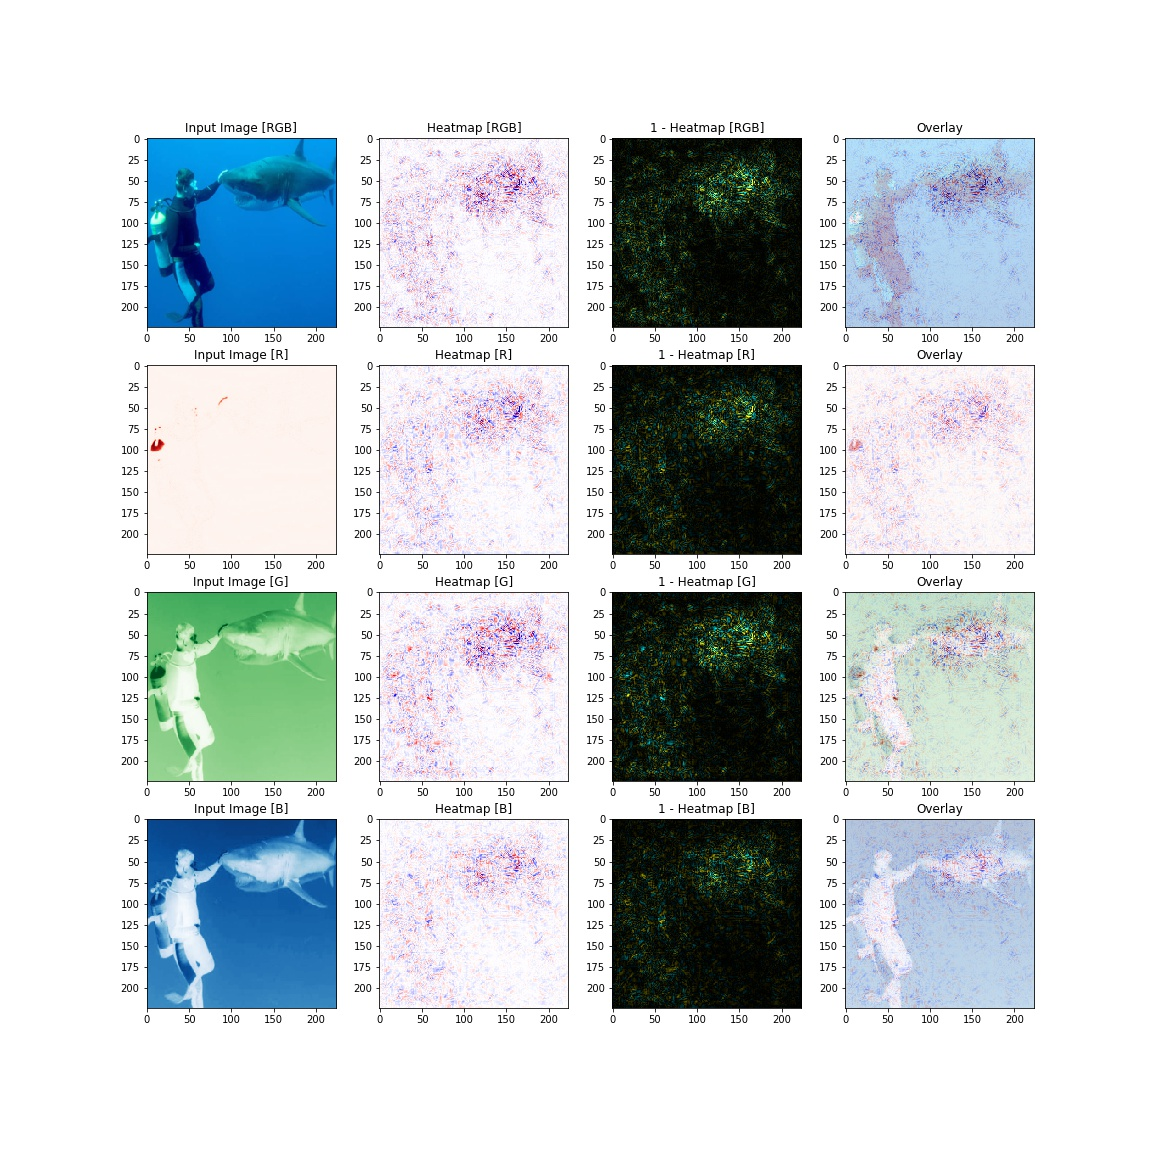

In [11]:
Image("/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_vanillaGrad_class_0.JPEG")

In [12]:
model = models.alexnet(pretrained=True)
model.eval()
model = model.cuda()
args.method = 'deConvNet'
out_prefix = os.path.join(results_path, '{}_{}'.format(args.mname, args.method))
untangle_ai.deConvNet(model, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_diff_clas

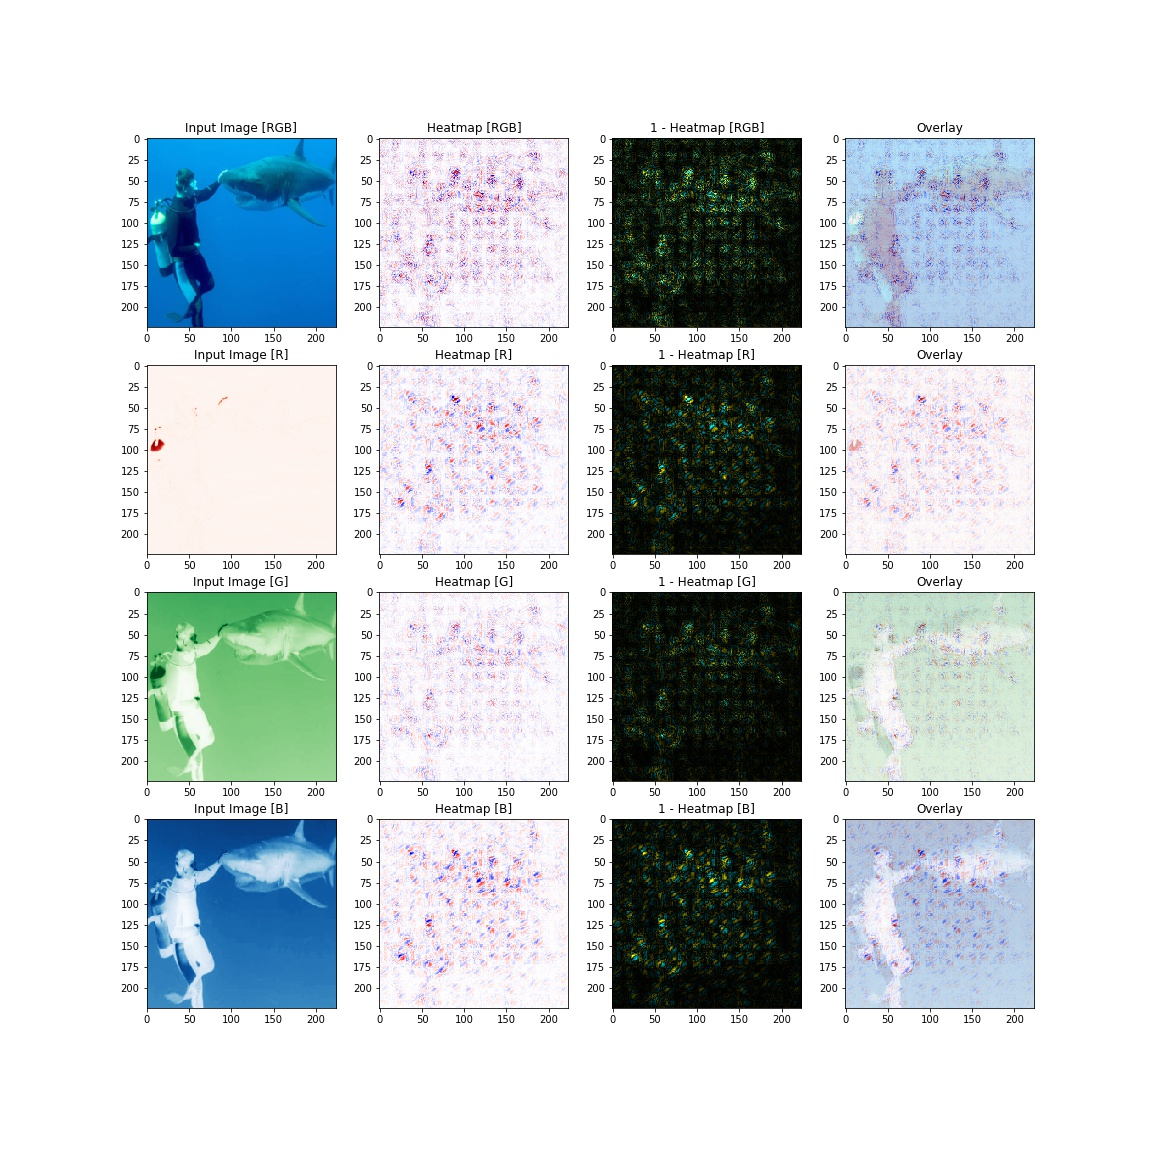

In [13]:
Image("/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_deConvNet_class_0.JPEG")

In [14]:
model = models.alexnet(pretrained=True)
model.eval()
model = model.cuda()
args.method = 'guided_bp'
out_prefix = os.path.join(results_path, '{}_{}'.format(args.mname, args.method))
untangle_ai.guided_bp(model, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_diff_clas

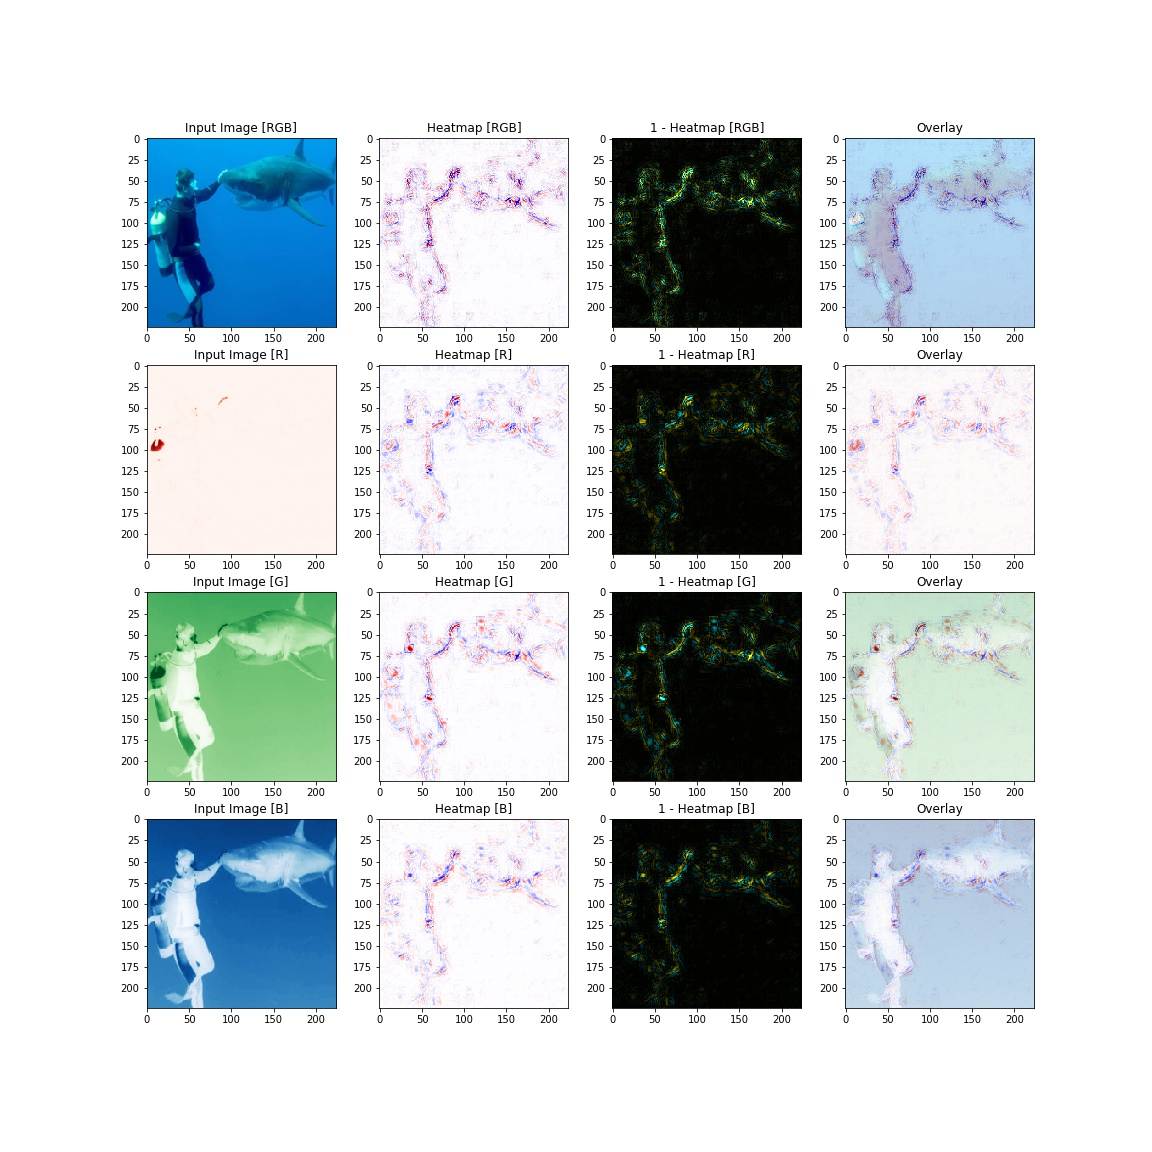

In [15]:
Image("/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_guided_bp_class_0.JPEG")

In [17]:
model = models.alexnet(pretrained=True)
model.eval()
model = model.cuda()
args.method = 'saliencyGrad'
out_prefix = os.path.join(results_path, '{}_{}'.format(args.mname, args.method))
untangle_ai.saliencyGrad(model, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_sali

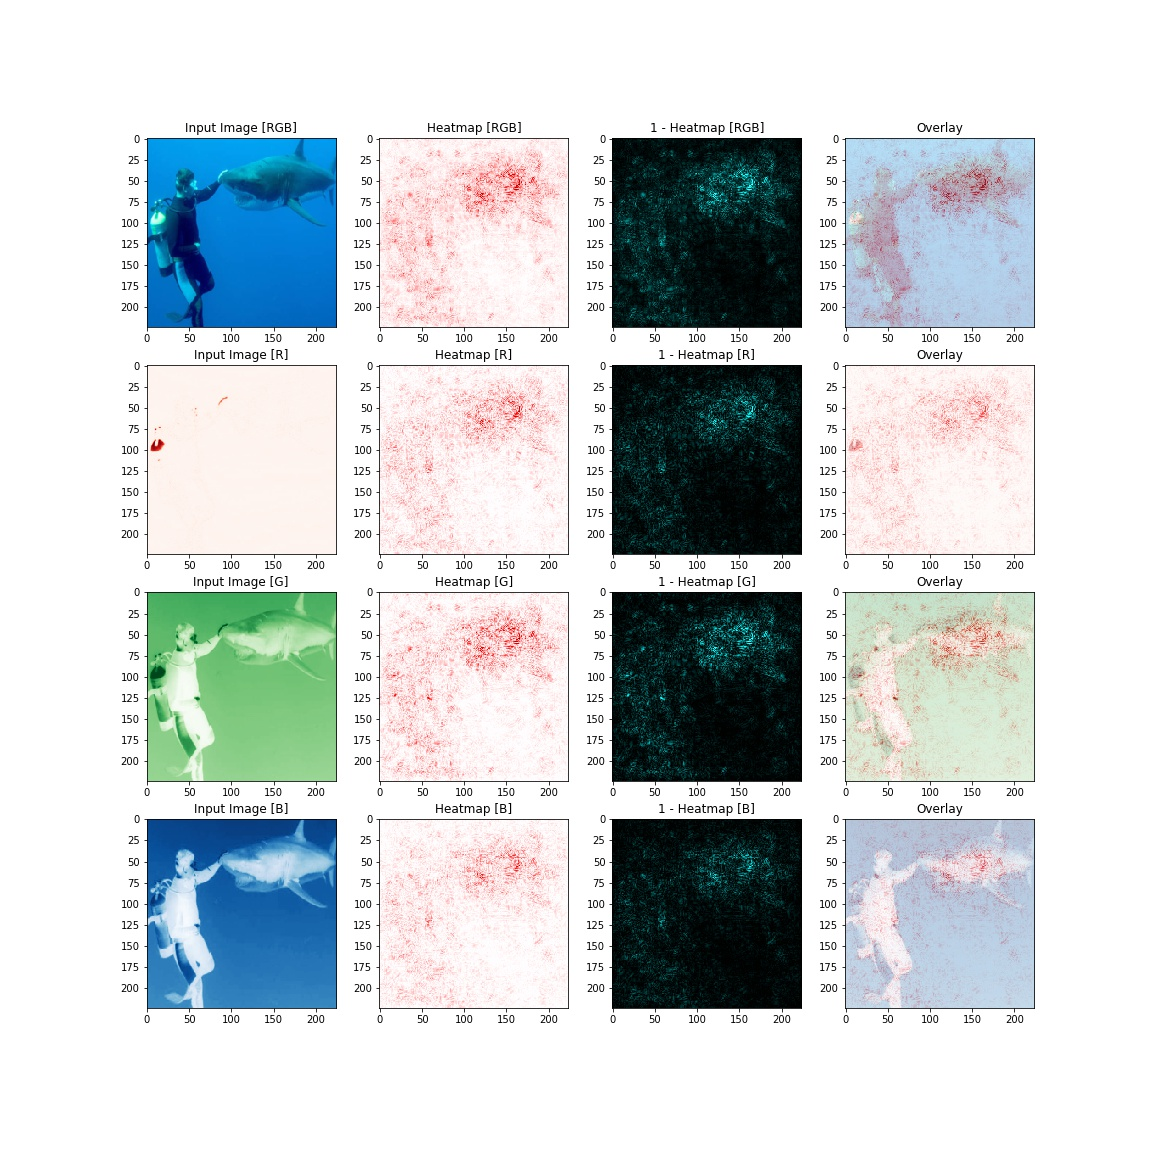

In [18]:
Image("/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_saliencyGrad_class_0.JPEG")

In [20]:
model = models.alexnet(pretrained=True)
model.eval()
model = model.cuda()
args.method = 'integratedGrad'
out_prefix = os.path.join(results_path, '{}_{}'.format(args.mname, args.method))
untangle_ai.integratedGrad(model, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/al

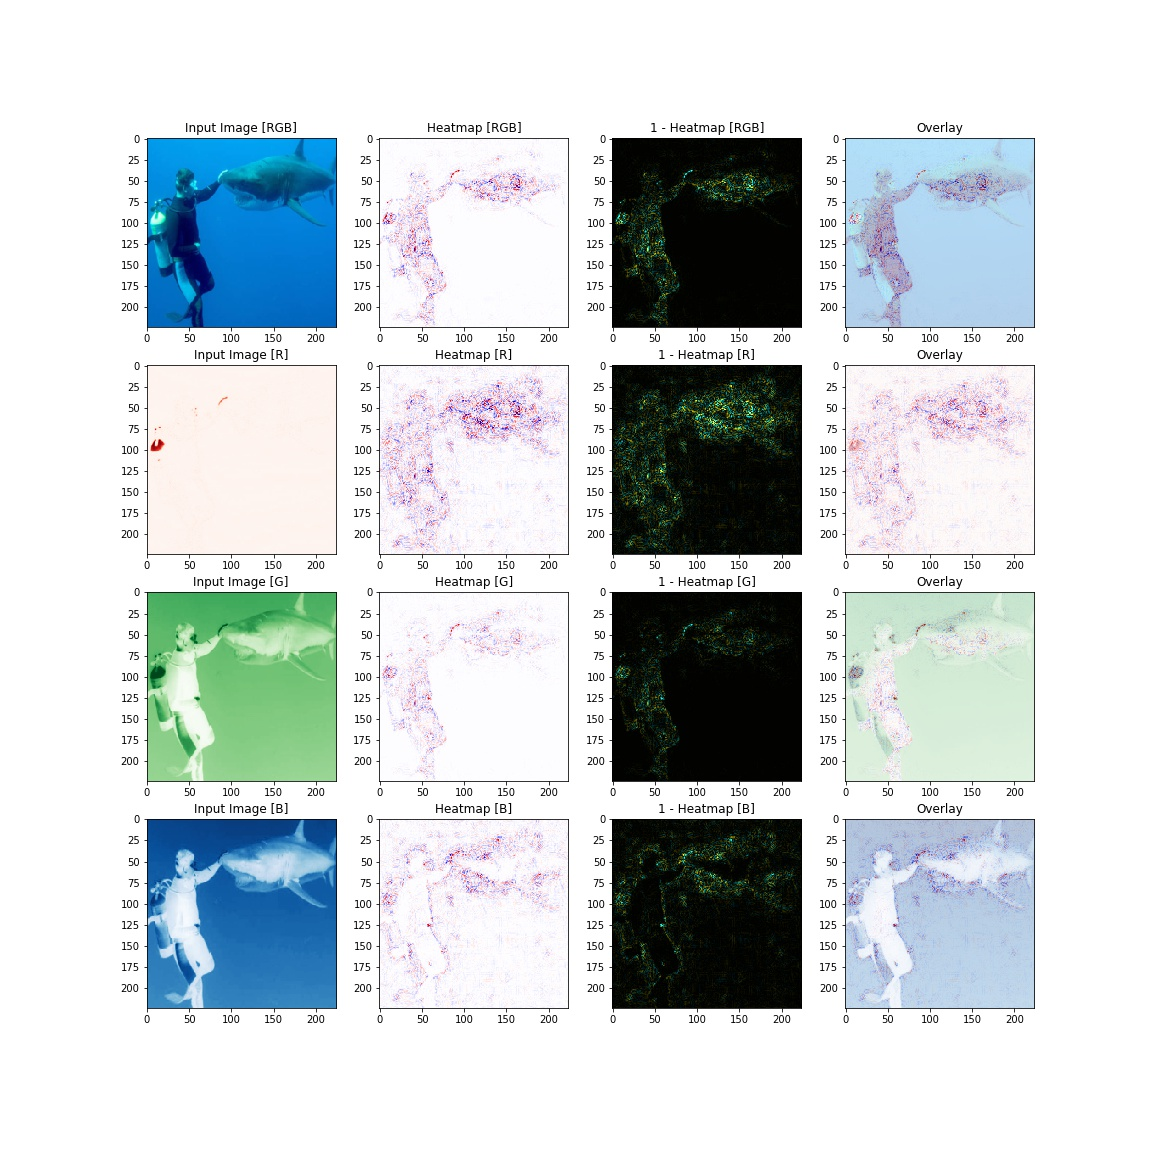

In [21]:
Image('/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_class_0.JPEG')

In [22]:
model = models.alexnet(pretrained=True)
model.eval()
model = model.cuda()
args.method = 'smoothgrad'
args.base_method = 'integratedGrad'
stdev_spread = 0.05
nsamples = 25
magnitude = False

out_prefix = os.path.join(results_path, '{}_{}_{}'.format(args.mname, args.base_method, args.method))
base_explainer = untangle_ai.get_explainer(args.base_method, model, args)
untangle_ai.smoothgrad(model, base_explainer, input_tensor, input_img, out_prefix, args)

Top-5 class(es): ['983', '65', '2', '3', '148']
Top-5 logit(s): [19.82872, 14.549128, 14.494809, 13.264013, 13.225012]
Top-5 probs(s): [0.98459136, 0.005016007, 0.004750813, 0.0013875226, 0.0013344488]
class_0 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_0.JPEG`
class_1 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_1.JPEG`
class_2 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_2.JPEG`
class_3 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_3.JPEG`
class_4 specific heatmap saved in path: `/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_4.JPEG`
difference heatmap estimation
class_1 specific diff heatmap saved in path: `/h

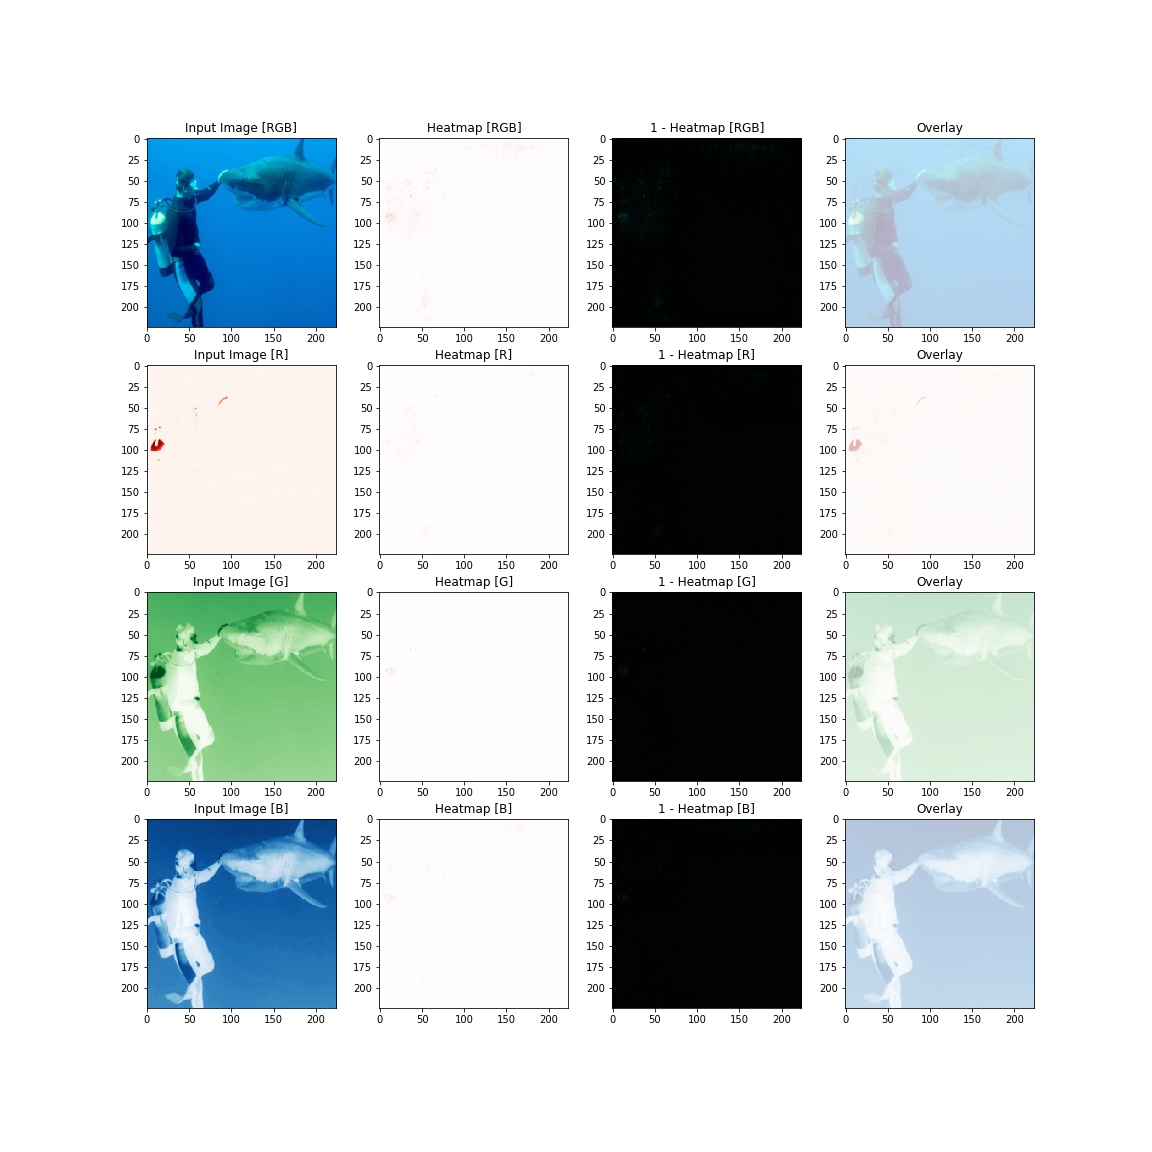

In [23]:
Image('/home/jupyter/texture-vs-shape/models/baseline_results/alexnet_integratedGrad_smoothgrad_class_0.JPEG')